<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%22%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%BB%D0%BE%D0%B8_%D0%B2_%D1%81%D0%B5%D1%82%D1%8F%D1%85_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%22_%D0%BD%D0%B0_Kaggle%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ООО "Университет Цифровых Технологий платформа 3"

##Домашнее задание к уроку "Рекуррентные и одномерные сверточные слои в сетях обработки текстов."

Определение тональности текста. Цель состоит в том, чтобы определить тональность текста на основе предоставленных данных. Данные представляют набор текстовых данных отзывов на покупку мобильных телефонов и аксессуаров. Где отзывы определены по 5-ти бальной оценке где 5 — максимально положительный отзыв, 1 — максимально отрицательный отзыв.

Загрузите из датасета текстовую базу отзывов на покупку мобильных телефонов и аксессуаров, а также базу для тестирования. Подайте дата сет в нейронную сеть, постаравшись добиться максимальной точности распознавания. 

Для улучшения обучения можно использовать:  
1. Выбрать модель сверточную или рекуррентную сеть. 
2. Использовать дополнительные методы, не рассмотренные в занятиях, слои, функции активации, менять параметры оптимизатора  и прочие гипер параметры. 

Предсказание Вашей сети необходимо отправить в виде специального файла с расширением csv, чтобы войти в рейтинговую таблицу соревнования. Ответ можно улучшить и подавать результат несколько раз.

Содержание датасета: Набор текстовых данных содержат отзывы покупателей на покупку мобильных телефонов и аксессуаров и анализ тональности по 5-ти бальной шкале.

###Инициализация необходимых библиотек.

In [ ]:
import numpy as np # модуль для загрузки файлов в colab
import pandas as pd #библиотека для работы с таблицами pandas
from google.colab import files #библиотека для работы с массивами данных
import json

from sklearn.model_selection import train_test_split
import tensorflow as tf # импортируем tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer,tokenizer_from_json
from tensorflow.keras.utils import plot_model, get_file, to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
# Загружаем стандартные слои нейросети(полносвязный, регуляризации, нормализации, векторного представления слов, выравнивания, активации)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import zipfile # для работы с архивами zip
import csv # импортируем модуль для удобной работы с файлами
import matplotlib as mpl
import matplotlib.pyplot as plt #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline
# устанавливаем свежий Kaggle API
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Ссылка на сревнование: https://www.kaggle.com/t/36855c178a164eb884324da040b0caad


Устанавливаем ключ Каггл, чтобы участвовать в соревнованиях. Это нужно сделать один раз.
Нужно зарегистрироваться на Каггл (https://www.kaggle.com/) и скачать ключ для взаимодействия с API соревновательной системы Каггла. После регистрации, справа появятся Ваши имя и фамилия - ссылка на персональную страницу. Нажмите на них. Когда страница загрузится, справа увидите Account. Нажимаете на надпись, затем прокручиваете страницу вниз, до вкладки API, там нажимаете Create New API Token. Ключ - это файл kaggle.json, который скачается после нажатия. Нужно скопировать его в папку Google Drive, предварительно её создав: My Drive/datasets/kaggle/ (из Колаба её адрес, который будем указывать для загрузки, такой: /content/drive/My Drive/datasets/kaggle/).

###Загрузка и знакомство с данными

In [ ]:
def Init_Kaggle():
    try:
        # Создаём правильную папку для ключа Каггл
        # в Колабе, она должна быть такой по требованию Каггл
        !mkdir ~/.kaggle
        # переходим в папку, теперь это путь по умолчанию
        %cd ~/.kaggle
        # запускаем - подключаем Google Drive - будем скачивать с него, так намного быстрее и удобнее
        # после запуска переходим по ссылке, которая появится, для идентификации
        # копируем оттуда код authorization code и вставляем здесь в окошко
        drive.mount('/content/drive')
        # нужно зарегистрироваться на Каггл и скачать ключ для взаимодействия с API
        # соревновательной системы Каггла kaggle.json. Нужно скопировать его в папку
        # Google Drive, предварительно её создав: /content/drive/My Drive/datasets/kaggle/
        !cp '/content/drive/My Drive/datasets/kaggle/kaggle.json' '/root/.kaggle/kaggle.json'
        # выводим версию API Kaggle:
        !kaggle --version
        !ls
        print(' Ключи Kaggle успешно установлены! ')
    except:
        print(' При установке ключей Kaggle произошла ошибка! ') 

In [ ]:
def Load_data_from_Kaggle():
    # считаем заполненную базу данных из kaggle
    %cd ~/.kaggle
    print('скачиваем данные с Каггл:')
    !kaggle competitions download -c rnn-ccn-for-text-udt-3
    print('загружаем из архива, распаковываем:')
    z = zipfile.ZipFile('rnn-ccn-for-text-udt-3.zip', 'r')
    z.extractall()
    # удаляем архив, чтобы не занимал место на диске
    !rm rnn-ccn-for-text-udt-3.zip
    #Считываем данные
    trainX = np.load('trainX.npy')
    trainY = np.load('trainY.npy')
    testX = np.load('testX.npy')
    return trainX, trainY, testX

In [ ]:
Init_Kaggle() # устанавливаем кючи кагл

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/root/.kaggle
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kaggle API 1.5.12
Conv1D_Model.png  Submission_review_phone.csv  trainX.npy
kaggle.json	  testX.npy		       trainY.npy
 Ключи Kaggle успешно установлены! 


In [ ]:
# загрузим данные 
trainX, trainY, testX = Load_data_from_Kaggle()

/root/.kaggle
скачиваем данные с Каггл:
 50% 5.00M/9.93M [00:00<00:00, 37.0MB/s]
100% 9.93M/9.93M [00:00<00:00, 61.5MB/s]
загружаем из архива, распаковываем:


In [ ]:
#зададим описательную часть тональности
ton = {
    1:'крайне негативная',
    2:'негативная',
    3:'посредственная',
    4:'положительная',
    5:'восхитительная'
    }

In [ ]:
# выведем несколько строк, проверим данные
for i in range(1,10):
    print(f'текст: {trainX[i]} \n в тональности: {trainY[i]} - {ton[trainY[i]]} ') #

текст: Цена 1599р Тусклый экран. Бликует на солнце, почти ничего не видно даже при максимальной яркости. А по сути за эти деньги недостатков нет Эти странные люди ставят минимальную оценку зная, что берут андроид не на гугле. А это везде написано. Идиотизм покупать товар и потом его же занижать! По сути девайс отличный за ту сумму! Вк работает стабильно, собеседника слышно отлично, и меня слышат хорошо, что главное для телефона. Интернет работает не плохо. Можно фильмы посмотреть, поиграть в игрули. Хорош как плеер. Камера так себе. Батарея сутки точно держит. Ничего не тормозит и не лагает. Только при зарядке сильно греется. Есть родной бампер к нему, плёнка в комплекте. Хорошая машинка за эти деньги. 
 в тональности: 5 - восхитительная 
текст: Элегантный, тонкий, яркий экран, защитное стекло, все работает 2 года, не плохая камера(кажется Сонька), полное соответствие цены и качеству. 1830 мА -аккумулятор, для меня не критично, средние наушники Работает почти 2 года, в самолете 5 часов

In [ ]:
# Выведем баланс классов
def Show_class_data(testY):
    count_Class = [0,0,0,0,0,0]
    for item in testY:
        count_Class[item] += 1
    print(f'Общее количество данных {sum(count_Class)} ')
    for i in range(1,6):
        print(f'По классу {ton[i]}: количество данных {count_Class[i]} ')
   

In [ ]:
Show_class_data(trainY)

Общее количество данных 21177 
По классу крайне негативная: количество данных 3601 
По классу негативная: количество данных 3081 
По классу посредственная: количество данных 4267 
По классу положительная: количество данных 5125 
По классу восхитительная: количество данных 5103 


In [ ]:
print('Размер обучающей выборки          :',len(trainX))
print('Размер меток на обучающей выборки :',len(trainY))
print('Размер тестовой выборки           :',len(testX))

Размер обучающей выборки          : 21177
Размер меток на обучающей выборки : 21177
Размер тестовой выборки           : 3738


###Обработка данных.

Создадим токенайзер, для перевода текстовой последовательности в цифровую, поскольку алгоритмы глубокого обучения и машинного обучения работают с числами. Дополнительно зададим возможность  загрузки токенайзера обученного на этих данных и ранее сохраненного на сервере университета.

In [ ]:
# Подключаем керасовский токенизатор и собираем словарь индексов
def Create_and_save_tokenizer(trainX, # база отзывов
                              maxWordsCount = None, # Определяем максимальное количество слов/индексов, учитываемое при обучении текстов
                              load_flag = False,    # необходимость загрузить готовый токенайзер ранее обученный на этих данных
                              ):
    if load_flag:
        tok_path = tf.keras.utils.get_file(origin='http://dataudt.ru/datasets/tokenizer_for_kaleydoskop.json', fname='tokenizer_for_kaleydoskop.json')
        with open(tok_path) as f:
            data = json.load(f)
            tokenizer = tokenizer_from_json(data)
    else:
        tokenizer = Tokenizer(num_words=maxWordsCount, # максимальное количество слов, которые будет учитывать наш токенайзер
                            lower=True, # приводятся ли все символы к нижнему регситру
                            split=' ', # символ, по которому происходит разделение на слова (токены)
                            oov_token='unknown', # токен для неизвестных слов 
                            char_level=False, # являются ли токенами отдельные буквы
                            filters='"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff' # символы, которые он токенайзер будет фильтровать
                            )
        tokenizer.fit_on_texts(trainX) # + trainX1) # загружаем в токенизатор список отзывов для сборки словаря частотности
    vocabularyItems = list(tokenizer.word_index.items()) # список с cодержимым словаря
    vocabularySize = len(vocabularyItems)+1 # размер словаря
    print(f'Фрагмент словаря : {vocabularyItems[:50]}')
    print(f'Размер словаря : {vocabularySize}')
    return tokenizer, vocabularySize

In [ ]:
# если задать load_flag = True, то можно загрузить токенайзер ранее обученный на этих данных, с сервера университета
tokenizer, vocabularySize = Create_and_save_tokenizer(np.concatenate((trainX,testX),axis=0), maxWordsCount = 15000)

Фрагмент словаря : [('unknown', 1), ('не', 2), ('и', 3), ('в', 4), ('на', 5), ('с', 6), ('телефон', 7), ('что', 8), ('но', 9), ('очень', 10), ('за', 11), ('для', 12), ('экран', 13), ('по', 14), ('как', 15), ('при', 16), ('камера', 17), ('все', 18), ('это', 19), ('то', 20), ('2', 21), ('а', 22), ('нет', 23), ('у', 24), ('я', 25), ('если', 26), ('так', 27), ('только', 28), ('из', 29), ('через', 30), ('он', 31), ('3', 32), ('1', 33), ('работает', 34), ('батарея', 35), ('5', 36), ('его', 37), ('после', 38), ('цена', 39), ('меня', 40), ('к', 41), ('от', 42), ('можно', 43), ('даже', 44), ('4', 45), ('просто', 46), ('бы', 47), ('есть', 48), ('памяти', 49), ('без', 50)]
Размер словаря : 87097


In [ ]:
# метод для токенизации данных
def Tokenized_data(data_token, tokenizer, maxLen): 
    # Устанавливаем закодированные входные данные
    tokenizedDatas = tokenizer.texts_to_sequences(data_token) # разбиваем текст вопросов на последовательности индексов
    maxLenData = max([ len(x) for x in tokenizedDatas]) # уточняем длину самого большого элемента последовательности
    # Делаем последовательности одной длины, заполняя нулями более короткие вопросы
    if maxLen > maxLenData: maxLenData = maxLen
    paddedDatas = pad_sequences(tokenizedDatas, maxlen=maxLenData, padding='post')
    # Предподготавливаем данные для входа в сеть
    dataForInput = np.array(paddedDatas) # переводим в numpy массив
    return dataForInput, maxLenData

In [ ]:
# метод для переводa в one hot encoding 
def Updata_to_OHE(dataY): 
    oneHotdataY = to_categorical(dataY,6) # переводим в one hot vector
    oneHotdataY = np.array(oneHotdataY) # и сохраняем в виде массива numpy
    return oneHotdataY

Подготовим данные для подачи в нейронную сеть

In [ ]:
# Подготовим данные для обучающей выборки
trainX_ForInput, maxLenData = Tokenized_data(trainX, tokenizer, 0)
trainY_OHE = Updata_to_OHE(trainY)
# Подготовим данные для тестовой выборки
testX_ForInput, max_test_LenData = Tokenized_data(testX, tokenizer, maxLenData)

In [ ]:
trainY_OHE = Updata_to_OHE(trainY)

###Создадим модели нейронной сети.

In [ ]:
def Plot_train_history(history, title):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(accuracy))

    plt.figure()

    plt.plot(epochs, accuracy, 'b', label='Доля верных ответов на обучающем наборе')
    plt.plot(epochs, val_accuracy, 'r', label='Доля верных ответов на проверочном наборе')
    plt.title(title)
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')
    plt.legend()

    plt.show()

LSTM

In [ ]:
def Create_LSTM_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEL = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEL.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEL.add(LSTM(4))
    modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEL

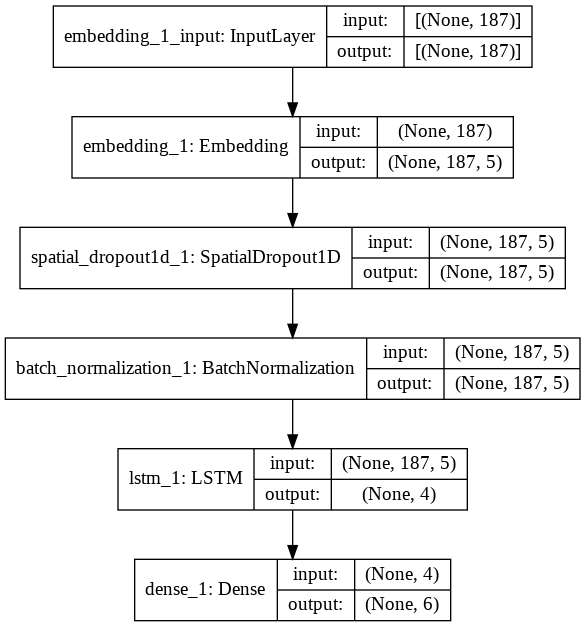

In [ ]:
# Создадим экземпляр модели нейронной сети
LSTM_Model = Create_LSTM_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(LSTM_Model, to_file='LSTM_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_LSTM_Model = LSTM_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=200, validation_split=0.2)

Epoch 1/100
85/85 [==============================] - 3s 35ms/step - loss: 1.5446 - accuracy: 0.2732 - val_loss: 1.5557 - val_accuracy: 0.2467
Epoch 2/100
85/85 [==============================] - 3s 34ms/step - loss: 1.5430 - accuracy: 0.2729 - val_loss: 1.5554 - val_accuracy: 0.2460
Epoch 3/100
85/85 [==============================] - 3s 34ms/step - loss: 1.5410 - accuracy: 0.2764 - val_loss: 1.5547 - val_accuracy: 0.2474
Epoch 4/100
85/85 [==============================] - 3s 34ms/step - loss: 1.5441 - accuracy: 0.2821 - val_loss: 1.5588 - val_accuracy: 0.2460
Epoch 5/100
85/85 [==============================] - 3s 34ms/step - loss: 1.5433 - accuracy: 0.2755 - val_loss: 1.5600 - val_accuracy: 0.2448
Epoch 6/100
85/85 [==============================] - 3s 35ms/step - loss: 1.5446 - accuracy: 0.2794 - val_loss: 1.5586 - val_accuracy: 0.2488
Epoch 7/100
85/85 [==============================] - 3s 34ms/step - loss: 1.5415 - accuracy: 0.2788 - val_loss: 1.5576 - val_accuracy: 0.2450
Epoch 

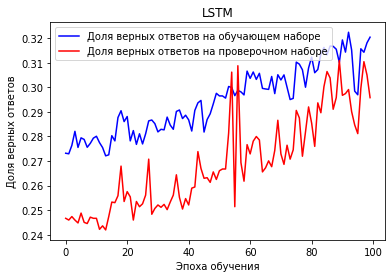

In [ ]:
Plot_train_history(history_LSTM_Model, 'LSTM')

In [ ]:
LSTM_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/LSTM_Model.h5') # сохраним модель по необходимости
# LSTM_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/LSTM_Model.h5') # загрузим модель по необходимости

Bidirectional

In [ ]:
def Create_Bidirectional_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEL = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEL.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEL.add(Bidirectional(LSTM(4)))
    modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEL

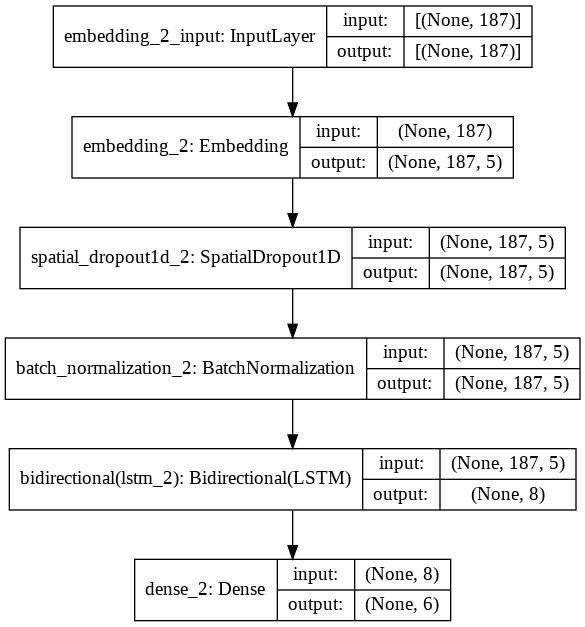

In [ ]:
# Создадим экземпляр модели нейронной сети
Bidirectional_Model = Create_Bidirectional_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(Bidirectional_Model, to_file='Bidirectional_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_Bidirectional_Model = Bidirectional_Model.fit(trainX_ForInput, trainY_OHE, epochs=100, batch_size=160, validation_split=0.2)

Epoch 1/100
106/106 [==============================] - 12s 80ms/step - loss: 1.6579 - accuracy: 0.2418 - val_loss: 1.6831 - val_accuracy: 0.2309
Epoch 2/100
106/106 [==============================] - 8s 72ms/step - loss: 1.5866 - accuracy: 0.2808 - val_loss: 1.6320 - val_accuracy: 0.2309
Epoch 3/100
106/106 [==============================] - 8s 72ms/step - loss: 1.5364 - accuracy: 0.3091 - val_loss: 1.6123 - val_accuracy: 0.2309
Epoch 4/100
106/106 [==============================] - 8s 71ms/step - loss: 1.4571 - accuracy: 0.3705 - val_loss: 1.5969 - val_accuracy: 0.2429
Epoch 5/100
106/106 [==============================] - 8s 72ms/step - loss: 1.3747 - accuracy: 0.4306 - val_loss: 1.4800 - val_accuracy: 0.3381
Epoch 6/100
106/106 [==============================] - 8s 72ms/step - loss: 1.3029 - accuracy: 0.4651 - val_loss: 1.3660 - val_accuracy: 0.3966
Epoch 7/100
106/106 [==============================] - 8s 71ms/step - loss: 1.2384 - accuracy: 0.4935 - val_loss: 1.3078 - val_accuracy

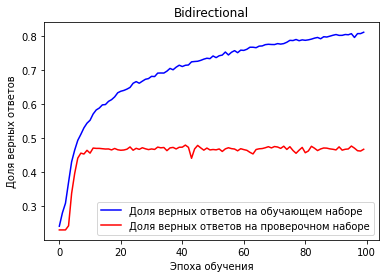

In [ ]:
Plot_train_history(history_Bidirectional_Model, 'Bidirectional')

In [ ]:
history_Bidirectional_Model = Bidirectional_Model.fit(trainX_ForInput, trainY_OHE, epochs=200, batch_size=200, validation_split=0.2)

Epoch 1/200
85/85 [==============================] - 2s 23ms/step - loss: 0.3668 - accuracy: 0.8701 - val_loss: 2.6250 - val_accuracy: 0.4518
Epoch 2/200
85/85 [==============================] - 2s 23ms/step - loss: 0.3678 - accuracy: 0.8729 - val_loss: 2.5980 - val_accuracy: 0.4528
Epoch 3/200
85/85 [==============================] - 2s 22ms/step - loss: 0.3666 - accuracy: 0.8702 - val_loss: 2.6350 - val_accuracy: 0.4490
Epoch 4/200
85/85 [==============================] - 2s 22ms/step - loss: 0.3639 - accuracy: 0.8729 - val_loss: 2.6098 - val_accuracy: 0.4502
Epoch 5/200
85/85 [==============================] - 2s 22ms/step - loss: 0.3611 - accuracy: 0.8724 - val_loss: 2.6593 - val_accuracy: 0.4542
Epoch 6/200
85/85 [==============================] - 2s 22ms/step - loss: 0.3602 - accuracy: 0.8740 - val_loss: 2.6156 - val_accuracy: 0.4533
Epoch 7/200
85/85 [==============================] - 2s 22ms/step - loss: 0.3561 - accuracy: 0.8759 - val_loss: 2.6627 - val_accuracy: 0.4511
Epoch 

In [ ]:
Bidirectional_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/Bidirectional_Model.h5') # сохраним модель по необходимости
# Bidirectional_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/Bidirectional_Model.h5') # загрузим модель по необходимости

Conv1D

In [ ]:
def Create_Conv1D_Model(embeding_size, maxLenData, maxWordsCount = 10000):
    modelEC = Sequential() # создаём последовательную модель нейросети

    # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
    modelEC.add(Embedding(maxWordsCount, embeding_size, input_length=maxLenData ))

    modelEC.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
    modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
    modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
    modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
    modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
    modelEC.add(BatchNormalization()) # добавляем слой нормализации данных

    
    modelEC.add(Conv1D(40, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
    modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
    modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
    modelEC.add(BatchNormalization()) # добавляем слой нормализации данных


    modelEC.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)

    modelEC.add(Dense(100, activation='relu')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое
    
    modelEC.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

    # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
    modelEC.compile(optimizer='rmsprop',  
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    return modelEC

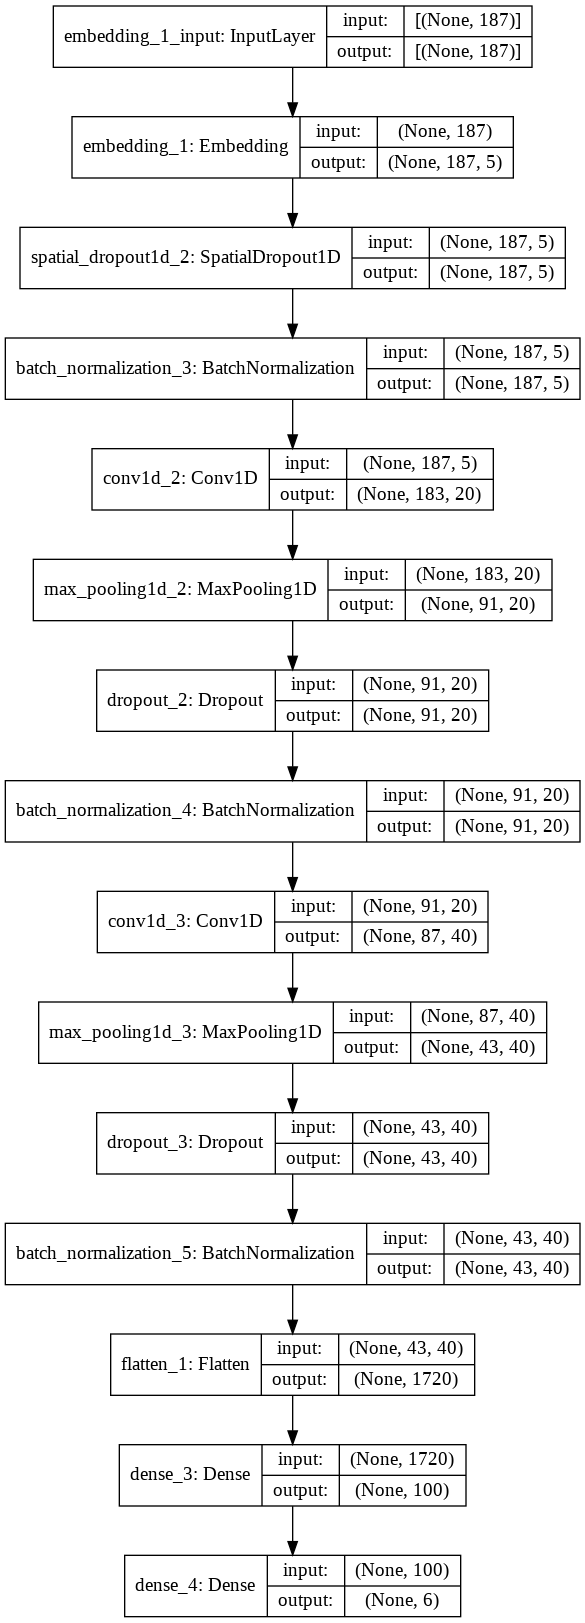

In [ ]:
# Создадим экземпляр модели нейронной сети
Conv1D_Model = Create_Conv1D_Model(5, maxLenData)
# и построим график для визуализации слоев и связей между ними
plot_model(Conv1D_Model, to_file='Conv1D_Model.png', show_shapes=True) 

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_Conv1D_Model = Conv1D_Model.fit(trainX_ForInput, trainY_OHE, epochs=300, batch_size=200, validation_split=0.2)

Epoch 1/300
85/85 [==============================] - 3s 19ms/step - loss: 1.7252 - accuracy: 0.2284 - val_loss: 1.6609 - val_accuracy: 0.1759
Epoch 2/300
85/85 [==============================] - 1s 16ms/step - loss: 1.5884 - accuracy: 0.2610 - val_loss: 1.6051 - val_accuracy: 0.2309
Epoch 3/300
85/85 [==============================] - 1s 15ms/step - loss: 1.3859 - accuracy: 0.3689 - val_loss: 1.6910 - val_accuracy: 0.1759
Epoch 4/300
85/85 [==============================] - 1s 15ms/step - loss: 1.2415 - accuracy: 0.4363 - val_loss: 1.4978 - val_accuracy: 0.2708
Epoch 5/300
85/85 [==============================] - 1s 15ms/step - loss: 1.1645 - accuracy: 0.4746 - val_loss: 1.3757 - val_accuracy: 0.3848
Epoch 6/300
85/85 [==============================] - 1s 15ms/step - loss: 1.1018 - accuracy: 0.5073 - val_loss: 1.3494 - val_accuracy: 0.3633
Epoch 7/300
85/85 [==============================] - 1s 14ms/step - loss: 1.0559 - accuracy: 0.5263 - val_loss: 1.2642 - val_accuracy: 0.4169
Epoch 

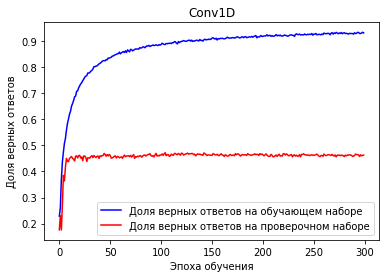

In [ ]:
Plot_train_history(history_Conv1D_Model, 'Conv1D')

In [ ]:
# Обучаем сеть с указанием обучающей выборки, количества эпох, размера минибатча для подачи сети, и размера валидационной выборки
history_Conv1D_Model = Conv1D_Model.fit(trainX_ForInput, trainY_OHE, epochs=1000, batch_size=200, validation_split=0.2)

Epoch 1/1000
85/85 [==============================] - 1s 16ms/step - loss: 0.1862 - accuracy: 0.9335 - val_loss: 2.8284 - val_accuracy: 0.4608
Epoch 2/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1910 - accuracy: 0.9302 - val_loss: 2.7651 - val_accuracy: 0.4636
Epoch 3/1000
85/85 [==============================] - 1s 13ms/step - loss: 0.1807 - accuracy: 0.9338 - val_loss: 2.7527 - val_accuracy: 0.4625
Epoch 4/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1934 - accuracy: 0.9290 - val_loss: 2.6570 - val_accuracy: 0.4563
Epoch 5/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1933 - accuracy: 0.9288 - val_loss: 2.8176 - val_accuracy: 0.4577
Epoch 6/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1855 - accuracy: 0.9295 - val_loss: 2.8035 - val_accuracy: 0.4570
Epoch 7/1000
85/85 [==============================] - 1s 14ms/step - loss: 0.1948 - accuracy: 0.9303 - val_loss: 2.7360 - val_accuracy: 0.4566

In [ ]:
Conv1D_Model.save('/content/drive/My Drive/datasets/LSTM_Conv1D/Conv1D_Model2.h5') # сохраним модель по необходимости
# Conv1D_Model = load_model('/content/drive/My Drive/datasets/LSTM_Conv1D/Conv1D_Model2.h5') # загрузим модель по необходимости

In [ ]:
# Собираем статистический результат предикта
def Create_predict_model(Model_test, testX_ForInput):
    try:
        Output_FortestX = np.argmax(Model_test.predict(testX_ForInput),axis=-1)
        print('Данные успешно сформированы!')
    except:
        print('Попытка сформировать предсказанные данные не удалась!')
    return Output_FortestX

In [ ]:
# оформить результат и отправить на Kaggle
def Send_results(pred_data_my):
    try:
        predUnscaled = pred_data_my.squeeze()
        # создаём датафрейм в нужном формате
        submission = pd.DataFrame({"Id":range(1,len(predUnscaled)+1),"Label":predUnscaled})
        
        #submission.head()
        # сохраняем его как csv
        submission = submission.to_csv('./Submission_review_phone.csv', sep=',', index=False, header=True)
        # отправляем на соревнование
        !kaggle competitions submit -c rnn-ccn-for-text-udt-3 -f Submission_review_phone.csv -m "Message"
        print('\n Расчитанные данные успешно отправлены! ')
    except:
        print('Отправка расчетных данных не прошла! ')  

In [ ]:
# сформируем результат предсказания, на заданной модели
prediction_data = Create_predict_model(Conv1D_Model, testX_ForInput)
# prediction_data = Create_predict_model(Bidirectional_Model, testX_ForInput)

Данные успешно сформированы!


In [ ]:
Send_results(prediction_data) # оформить результат и отправить на Kaggle

100% 24.5k/24.5k [00:00<00:00, 28.5kB/s]
Successfully submitted to Университет Цифровых Технологий платформа 3
 Расчитанные данные успешно отправлены! 
